In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/home/hwan/.local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [4]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


In [5]:
y2 = y.copy()

In [6]:
print(y2)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


In [7]:
y2.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01',
               '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01'],
              dtype='datetime64[ns]', length=526, freq='MS')

In [12]:
y=y2[:'1994-12-31']

In [13]:
print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
1994-08-01    357.375000
1994-09-01    355.925000
1994-10-01    356.020000
1994-11-01    357.575000
1994-12-01    359.060000
Freq: MS, Name: co2, Length: 442, dtype: float64


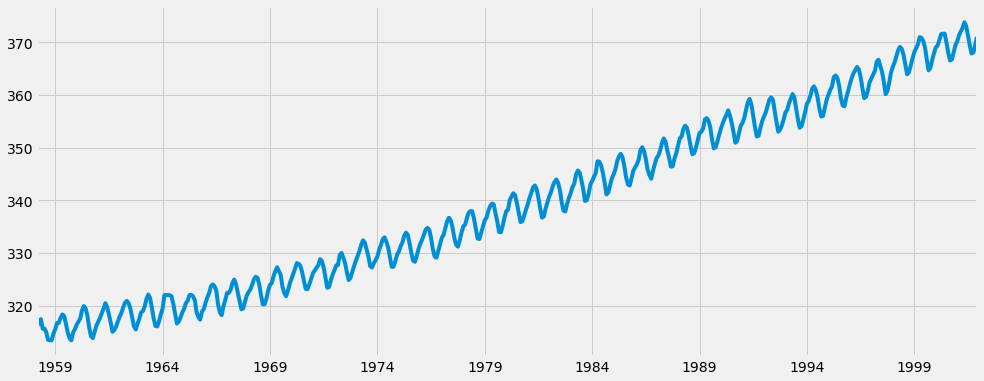

In [9]:
y2.plot(figsize=(15,6))
plt.show()

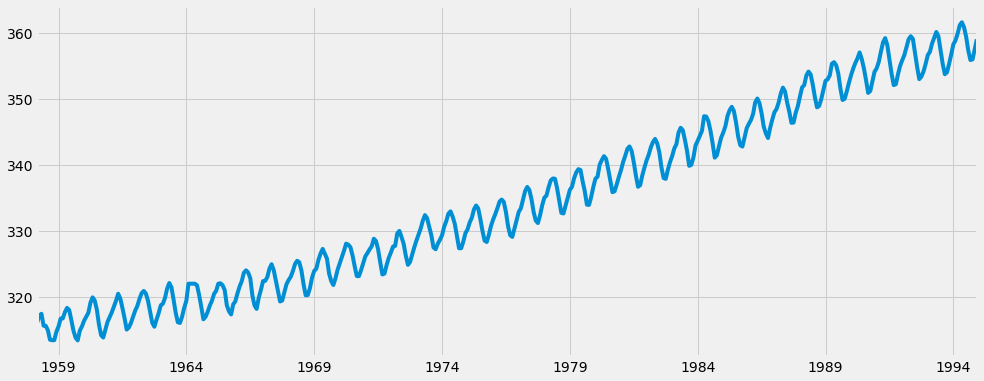

In [14]:
y.plot(figsize=(15, 6))
plt.show()

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21649D+00    |proj g|=  7.36655D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.367D-07   7.216D+00
  F =   7.2164918058216916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6381.378756346376
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.69667D+00    |proj g|=  5.16915D-03

At iterate   10    f=  6.69653D+00    |proj g|=  1.89564D-02

At iterate   15    f=  6.66992D+00    |proj g|=  4.36815D-01

At iterate   20    f=  6.42789D+00    |proj g|=  3.40161D-01

At iterate   25    f=  6.40991D+00    |proj g|=  7.72005D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     25     38      1     0     0   7.720D-07   6.410D+00
  F =   6.4099069798476789     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5670.357770185348
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1498.3429144734755
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68732D+00    |proj g|=  8.05465D-01

At iterate    5    f=  1.44838D+00    |proj g|=  3.25408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   2.577D-06   1.448D+00
  F =   1.4483761533174015     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1284.364519532583
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   1.297D+00   9.570D-01
  F =  0.95698534147860548     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:849.9750418670873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.67816D-01    |proj g|=  2.37890D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  9.66790D-01    |proj g|=  1.52431D+01

At iterate   10    f=  9.57091D-01    |proj g|=  2.16091D+01

At iterate   15    f=  9.56413D-01    |proj g|=  1.32300D-01

At iterate   20    f=  9.55599D-01    |proj g|=  5.30550D+00

At iterate   25    f=  9.53085D-01    |proj g|=  2.50116D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     48      1     0     0   1.024D-03   9.531D-01
  F =  0.95308239351347390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:848.524835865911
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23386D+00    |proj g|=  1.20630D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.



At iterate    5    f=  1.03226D+00    |proj g|=  2.44004D-01

At iterate   10    f=  9.56728D-01    |proj g|=  3.62584D-01

At iterate   15    f=  9.55129D-01    |proj g|=  1.63180D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     23      1     0     0   1.632D-04   9.551D-01
  F =  0.95512863696815886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:850.3337150798525
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  6.83259D+00    |proj g|=  1.12150D-01

At iterate   20    f=  6.57713D+00    |proj g|=  4.29982D-01

At iterate   25    f=  6.51820D+00    |proj g|=  1.90174D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     28     49      1     0     0   1.219D-05   6.518D+00
  F =   6.5181981637894228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5766.08717678985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  7.45442D+00    |proj g|=  4.95794D-01

At iterate   10    f=  7.28133D+00    |proj g|=  1.59568D-01

At iterate   15    f=  7.27791D+00    |proj g|=  1.64386D-03

At iterate   20    f=  7.27341D+00    |proj g|=  4.97322D-01

At iterate   25    f=  6.69829D+00    |proj g|=  5.14462D-01

At iterate   30    f=  6.51696D+00    |proj g|=  2.85246D-01

At iterate   35    f=  6.43365D+00    |proj g|=  2.80189D-01

At iterate   40    f=  6.39225D+00    |proj g|=  1.11762D-01

At iterate   45    f=  6.37390D+00    |proj g|=  1.58906D-01

At iterate   50    f=  6.36288D+00    |proj g|=  1.87708D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1118.4551358797014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36598D+00    |proj g|=  3.72861D-01


 This problem is unconstrained.



At iterate    5    f=  1.12874D+00    |proj g|=  1.44338D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   3.239D-06   1.129D+00
  F =   1.1286957412263277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1003.7670352440737
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99842D+00    |proj g|=  6.13201D-01


 This problem is unconstrained.



At iterate    5    f=  6.54529D+00    |proj g|=  1.38994D-02

At iterate   10    f=  4.57239D+00    |proj g|=  1.44411D+01
  ys=-4.620E+00  -gs= 9.545E-01 BFGS update SKIPPED

At iterate   15    f=  8.42171D-01    |proj g|=  7.80033D+01

At iterate   20    f=  7.30593D-01    |proj g|=  1.57353D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     90      1     1     0   1.090D-01   7.306D-01
  F =  0.73055972693078519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:651.8147986068141
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.2

 This problem is unconstrained.



At iterate    5    f=  6.51900D+00    |proj g|=  2.89348D-03

At iterate   10    f=  6.50586D+00    |proj g|=  7.64438D-02

At iterate   15    f=  6.50153D+00    |proj g|=  4.18068D-02

At iterate   20    f=  6.47054D+00    |proj g|=  1.24464D-01

At iterate   25    f=  2.58614D+00    |proj g|=  1.59878D+02
  ys=-4.289E+00  -gs= 1.245E+00 BFGS update SKIPPED

At iterate   30    f=  2.24334D+00    |proj g|=  6.08250D+01

At iterate   35    f=  1.19153D+00    |proj g|=  2.05813D+02

At iterate   40    f=  8.07375D-01    |proj g|=  2.02823D+01

At iterate   45    f=  7.83089D-01    |proj g|=  2.61580D+00

At iterate   50    f=  7.66444D-01    |proj g|=  2.35206D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  1.02425D+00    |proj g|=  2.04647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   2.664D-06   1.024D+00
  F =   1.0242523201408504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:911.4390510045118
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34376D+00    |proj g|=  1.20183D+00


 This problem is unconstrained.



At iterate    5    f=  7.87983D-01    |proj g|=  4.81802D-01

At iterate   10    f=  7.45466D-01    |proj g|=  5.67411D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     27      1     0     0   2.896D-05   7.454D-01
  F =  0.74542975556790370     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:666.9599039220269
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57973D+00    |proj g|=  2.16269D-03

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.16103D+00    |proj g|=  2.52777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     13      1     0     0   4.583D-06   1.161D+00
  F =   1.1610329761270930     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1030.3531508963501
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10983D-01    |proj g|=  7.01084D-02

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.32511D-01    |proj g|=  7.17542D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     15      1     0     0   1.532D-06   3.319D-01
  F =  0.33192465239790475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:297.4213927197478
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96276D-01    |proj g|=  4.68109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09187D-01    |proj g|=  1.07134D+00

At iterate    5    f=  3.77895D-01    |proj g|=  6.78132D-01

At iterate   10    f=  3.71846D-01    |proj g|=  1.30884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     21      1     0     0   8.114D-05   3.718D-01
  F =  0.37184623696648794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:334.7120734783753
RUNNING THE L-B

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      7      1     0     0   5.718D-05   4.590D-01
  F =  0.45895283288847649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:409.71430427341323
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71461D-01    |proj g|=  2.29818D-01


 This problem is unconstrained.



At iterate    5    f=  3.27989D-01    |proj g|=  2.48994D-01

At iterate   10    f=  3.14649D-01    |proj g|=  9.09457D-01
  ys=-1.086E-02  -gs= 2.996E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     41      1     1     0   4.772D-02   3.146D-01
  F =  0.31460035536559205     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:284.10671414318335
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28918D+00    |proj g|=  1.42282D+00

At iterate    5    f=  1.03192D+00    |proj g|=  2.53788D-02

At iterate   10    f=  1.03174D+00    |proj g|=  1.33623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   1.746D-06   1.032D+00
  F =   1.0317447117956831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:918.0623252273838
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.



At iterate    5    f=  5.66190D-01    |proj g|=  5.15334D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   5.153D-06   5.662D-01
  F =  0.56618986620866418     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:504.5118417284591
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64198D-01    |proj g|=  7.98820D-01


 This problem is unconstrained.



At iterate    5    f=  2.99099D-01    |proj g|=  9.13186D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     17      1     0     0   3.628D-05   2.990D-01
  F =  0.29903360710956239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:270.34570868485315
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36837D+00    |proj g|=  2.32481D+00


 This problem is unconstrained.



At iterate    5    f=  5.64600D-01    |proj g|=  1.07051D-01

At iterate   10    f=  5.62136D-01    |proj g|=  1.97394D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     19      1     0     0   5.421D-07   5.621D-01
  F =  0.56213602840862031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:502.9282491132203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23757D+00    |proj g|=  2.10695D+00


 This problem is unconstrained.



At iterate    5    f=  4.09007D-01    |proj g|=  7.32628D-01

At iterate   10    f=  3.55982D-01    |proj g|=  3.54532D-01

At iterate   15    f=  3.33623D-01    |proj g|=  6.43346D-01

At iterate   20    f=  3.28707D-01    |proj g|=  1.28744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     37      1     0     0   1.285D-03   3.287D-01
  F =  0.32870741106306017     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:298.5773513797452
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.19812D-01    |proj g|=  1.66298D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   8.622D-06   4.198D-01
  F =  0.41981192592029620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:377.11374251354187
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65039D-01    |proj g|=  8.02411D-01


 This problem is unconstrained.



At iterate    5    f=  2.89140D-01    |proj g|=  9.73330D-02

At iterate   10    f=  2.74996D-01    |proj g|=  1.46204D-01

At iterate   15    f=  2.74796D-01    |proj g|=  2.76495D-01

At iterate   20    f=  2.74767D-01    |proj g|=  1.13192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     43      1     0     0   1.132D-02   2.748D-01
  F =  0.27476672075141323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:250.8937811442493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04788D+00    |proj g|=  8.05446D-01


 This problem is unconstrained.



At iterate    5    f=  1.66901D+00    |proj g|=  4.86005D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     25      1     0     0   2.829D-01   1.669D+00
  F =   1.6686100339135093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1481.0512699795422
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99273D-01    |proj g|=  4.46004D-05

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30794D-01    |proj g|=  3.23103D-01


 This problem is unconstrained.



At iterate    5    f=  3.47930D-01    |proj g|=  2.85926D-01

At iterate   10    f=  3.33812D-01    |proj g|=  5.11756D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     29      1     0     0   6.752D-04   3.338D-01
  F =  0.33380280713044569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:301.081681503314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12389D+00    |proj g|=  7.00680D-01


 This problem is unconstrained.



At iterate    5    f=  5.97444D-01    |proj g|=  4.16391D-01

At iterate   10    f=  5.82185D-01    |proj g|=  1.76799D+00

At iterate   15    f=  5.49643D-01    |proj g|=  6.62950D-01

At iterate   20    f=  5.49639D-01    |proj g|=  8.45224D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     41      1     0     0   6.660D-06   5.496D-01
  F =  0.54963912971060058     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:491.8809906641709
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.04036D-01    |proj g|=  3.97883D-01

At iterate   10    f=  3.85979D-01    |proj g|=  1.85472D-01

At iterate   15    f=  3.71837D-01    |proj g|=  4.00228D-01

At iterate   20    f=  3.65992D-01    |proj g|=  6.56434D+00

At iterate   25    f=  3.65605D-01    |proj g|=  1.60193D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     51      1     0     0   1.602D-03   3.656D-01
  F =  0.36560548770776291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:331.1952511336624
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.46298D-01    |proj g|=  1.84209D+00

At iterate   10    f=  4.54700D-01    |proj g|=  1.22084D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   2.067D-05   4.547D-01
  F =  0.45469998312177878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:407.9547850796524
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01503D-01    |proj g|=  4.02945D-01


 This problem is unconstrained.



At iterate    5    f=  5.07660D-01    |proj g|=  1.27619D+00

At iterate   10    f=  3.20590D-01    |proj g|=  1.18455D-01

At iterate   15    f=  3.19647D-01    |proj g|=  2.64456D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     31      1     0     0   2.473D-04   3.196D-01
  F =  0.31963972705348226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:290.56151871527834
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   20    f=  1.32518D+00    |proj g|=  2.03359D+01

At iterate   25    f=  1.29716D+00    |proj g|=  4.12054D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     35      1     0     0   6.755D-06   1.297D+00
  F =   1.2971421754065038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1152.6736830593493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74550D+00    |proj g|=  2.19258D+00


 This problem is unconstrained.



At iterate    5    f=  1.97043D+00    |proj g|=  1.56550D+02

At iterate   10    f=  1.47110D+00    |proj g|=  4.93169D+00

At iterate   15    f=  1.43657D+00    |proj g|=  4.14216D-01

At iterate   20    f=  1.43592D+00    |proj g|=  8.11924D+00

At iterate   25    f=  1.39897D+00    |proj g|=  4.89571D+01

At iterate   30    f=  1.35401D+00    |proj g|=  4.15533D+00

At iterate   35    f=  1.35372D+00    |proj g|=  4.82587D-02

At iterate   40    f=  1.35361D+00    |proj g|=  1.29999D+00

At iterate   45    f=  1.34933D+00    |proj g|=  7.46435D+00

At iterate   50    f=  1.30287D+00    |proj g|=  3.44891D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:503.9912012016905
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94425D-01    |proj g|=  3.44845D-01


 This problem is unconstrained.



At iterate    5    f=  3.15027D-01    |proj g|=  5.94190D-01

At iterate   10    f=  3.00822D-01    |proj g|=  1.39148D-01

At iterate   15    f=  3.00700D-01    |proj g|=  1.52914D-01

At iterate   20    f=  3.00624D-01    |proj g|=  3.74367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     37      1     0     0   3.768D-04   3.006D-01
  F =  0.30062434749308087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:273.7519231838835
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  9.66017D-01    |proj g|=  6.78958D-01

At iterate   10    f=  7.97242D-01    |proj g|=  2.25988D+00

At iterate   15    f=  6.73876D-01    |proj g|=  1.36393D+00

At iterate   20    f=  5.79628D-01    |proj g|=  1.94763D+00

At iterate   25    f=  5.67104D-01    |proj g|=  6.47952D-02

At iterate   30    f=  5.63216D-01    |proj g|=  7.48443D+00

At iterate   35    f=  5.59315D-01    |proj g|=  1.27945D+00

At iterate   40    f=  5.56236D-01    |proj g|=  3.54875D-01

At iterate   45    f=  5.54450D-01    |proj g|=  6.88021D-01

At iterate   50    f=  5.53119D-01    |proj g|=  7.71340D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.05155D+00    |proj g|=  8.78437D-01

At iterate   10    f=  6.75390D-01    |proj g|=  4.86432D-01

At iterate   15    f=  5.66368D-01    |proj g|=  1.69335D+00

At iterate   20    f=  4.71200D-01    |proj g|=  5.81090D-01

At iterate   25    f=  4.59108D-01    |proj g|=  4.41123D-01

At iterate   30    f=  4.46554D-01    |proj g|=  1.13927D+01

At iterate   35    f=  4.40972D-01    |proj g|=  3.83084D-01

At iterate   40    f=  4.40670D-01    |proj g|=  1.17931D-01

At iterate   45    f=  4.38348D-01    |proj g|=  1.76507D+00

At iterate   50    f=  4.09980D-01    |proj g|=  1.02860D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11672D+00    |proj g|=  2.69302D+00

At iterate    5    f=  5.76916D-01    |proj g|=  1.58529D+00

At iterate   10    f=  4.21341D-01    |proj g|=  1.03657D-01

At iterate   15    f=  4.18449D-01    |proj g|=  3.64800D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   4.701D-06   4.184D-01
  F =  0.41844885539763055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1,

 This problem is unconstrained.



At iterate    5    f=  4.50466D-01    |proj g|=  9.14035D-01

At iterate   10    f=  3.27710D-01    |proj g|=  4.05186D+00

At iterate   15    f=  2.86418D-01    |proj g|=  1.56792D-01

At iterate   20    f=  2.76382D-01    |proj g|=  1.29080D-01

At iterate   25    f=  2.76197D-01    |proj g|=  7.11530D-03

At iterate   30    f=  2.76170D-01    |proj g|=  6.43331D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     56      1     0     0   1.473D-02   2.762D-01
  F =  0.27616094772522987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:254.1262777891

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08357D+00    |proj g|=  3.06440D-01

At iterate    5    f=  9.91564D-01    |proj g|=  3.74973D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   5.614D-06   9.916D-01
  F =  0.99156198244701121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:882.5407924831579
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   5.573D-05   5.794D-01
  F =  0.57938742033254120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:516.1784795739665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82325D-01    |proj g|=  8.34755D-01


 This problem is unconstrained.



At iterate    5    f=  3.08488D-01    |proj g|=  1.44855D-01

At iterate   10    f=  3.07612D-01    |proj g|=  1.38900D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     59      2     0     0   3.472D-05   3.076D-01
  F =  0.30761177622716634     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:277.92881018481506
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69848D-01    |proj g|=  5.73152D-01

At iterate    5    f=  5.81008D-01    |proj g|=  2.92854D-01


 This problem is unconstrained.



At iterate   10    f=  5.71224D-01    |proj g|=  5.67118D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     57      2     0     0   5.671D-05   5.712D-01
  F =  0.57122364161247974     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:510.96169918543205
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02257D-01    |proj g|=  7.58375D-01

At iterate    5    f=  5.54782D-01    |proj g|=  6.77339D-01

At iterate   10    f=  3.43475D-01    |proj g|=  5.51626D-01

At iterate   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     76      2     0     0   7.936D-05   3.423D-01
  F =  0.34233405518320764     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:310.62330478195554



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43613D-01    |proj g|=  5.43140D-01

At iterate    5    f=  4.25238D-01    |proj g|=  1.61015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   6.837D-05   4.252D-01
  F =  0.42523749729534405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:381.90994760908416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.97902D-01    |proj g|=  2.91068D-01

At iterate   10    f=  2.86466D-01    |proj g|=  2.68153D-02

At iterate   15    f=  2.86438D-01    |proj g|=  3.51103D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     29      1     0     0   1.916D-05   2.864D-01
  F =  0.28643747108161272     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:261.21072443614565
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05522D+00    |proj g|=  3.19293D-01

At iterate    5    f=  9.82386D-01    |proj g|=  2.62090D-03

At iterate   10    f=  9.82380D-01    |proj g|=  2.75191D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   2.752D-06   9.824D-01
  F =  0.98237974915258419     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:876.4236982508844
RUNNING THE L-B

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   1.960D-05   5.515D-01
  F =  0.55152350857000521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:493.5467815758846
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54629D-01    |proj g|=  8.23565D-01


 This problem is unconstrained.



At iterate    5    f=  2.90016D-01    |proj g|=  3.46174D-01

At iterate   10    f=  2.86067D-01    |proj g|=  1.17994D-02

At iterate   15    f=  2.85766D-01    |proj g|=  3.20303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   3.059D-05   2.858D-01
  F =  0.28576616643662139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:260.6172911299733
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.74949D-01    |proj g|=  5.67288D-01

At iterate   10    f=  5.57400D-01    |proj g|=  8.41148D-02

At iterate   15    f=  5.46087D-01    |proj g|=  1.21545D-02

At iterate   20    f=  5.46054D-01    |proj g|=  1.81116D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   6.019D-06   5.461D-01
  F =  0.54605398975044861     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:490.71172693939656
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  5.27833D-01    |proj g|=  7.97287D-01

At iterate   10    f=  3.31914D-01    |proj g|=  9.70804D-01

At iterate   15    f=  3.29681D-01    |proj g|=  8.55243D-01

At iterate   20    f=  3.25574D-01    |proj g|=  4.29295D-02

At iterate   25    f=  3.24073D-01    |proj g|=  6.32132D-02

At iterate   30    f=  3.14055D-01    |proj g|=  4.87784D-01

At iterate   35    f=  3.13747D-01    |proj g|=  2.71059D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     49      1     0     0   2.711D-03   3.137D-01
  F =  0.31374747936010117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.08090D-01    |proj g|=  1.59230D-03

At iterate   10    f=  4.08082D-01    |proj g|=  1.48069D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   3.826D-06   4.081D-01
  F =  0.40808178368504355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:368.7442967775785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57241D-01    |proj g|=  8.18814D-01


 This problem is unconstrained.



At iterate    5    f=  2.86284D-01    |proj g|=  4.40695D-01

At iterate   10    f=  2.67058D-01    |proj g|=  1.12437D+00
  ys=-1.806E-02  -gs= 6.134E-04 BFGS update SKIPPED

At iterate   15    f=  2.65252D-01    |proj g|=  4.99888D-03

At iterate   20    f=  2.65249D-01    |proj g|=  5.94399D-03

At iterate   25    f=  2.65248D-01    |proj g|=  5.70695D-02

At iterate   30    f=  2.65247D-01    |proj g|=  3.32101D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     55      1     1     0   3.321D-03   2.652D-01
  F =  0.26524716029597517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65039D-01    |proj g|=  8.02411D-01


 This problem is unconstrained.



At iterate    5    f=  2.89140D-01    |proj g|=  9.73330D-02

At iterate   10    f=  2.74996D-01    |proj g|=  1.46204D-01

At iterate   15    f=  2.74796D-01    |proj g|=  2.76495D-01

At iterate   20    f=  2.74767D-01    |proj g|=  1.13192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     43      1     0     0   1.132D-02   2.748D-01
  F =  0.27476672075141323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.

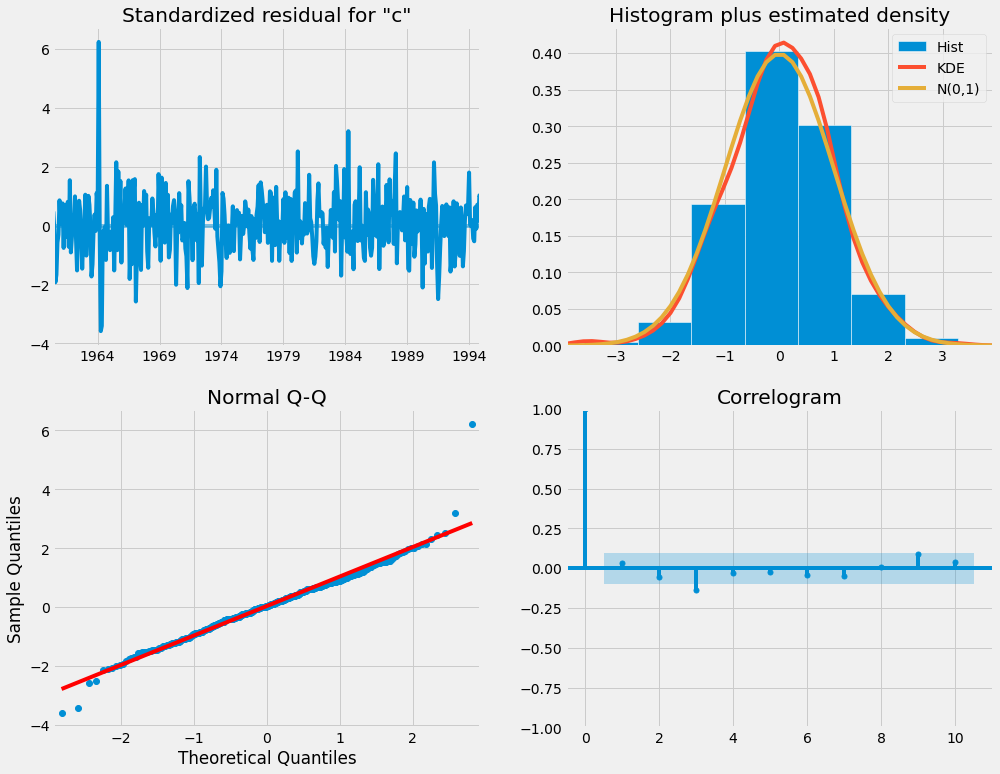

In [18]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [9]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

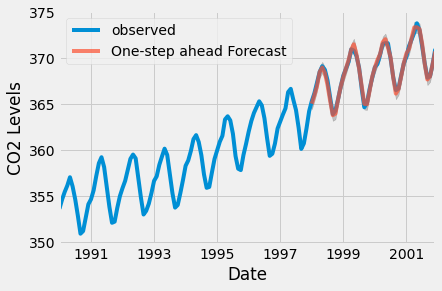

In [10]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [11]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [12]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

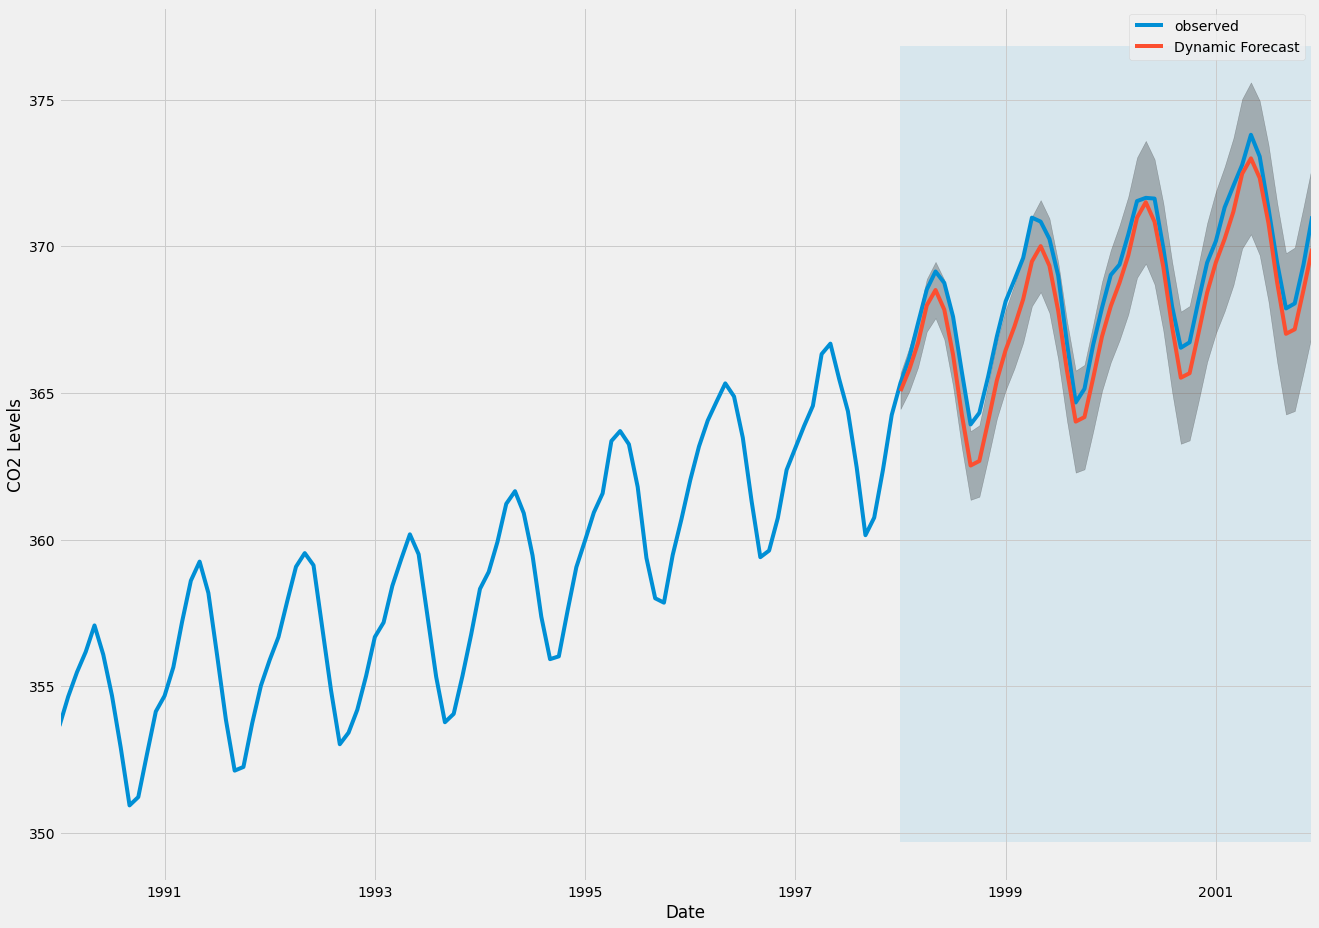

In [13]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [14]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01
